In [1]:
# Imbalanced to Balanced Dataset 

In [2]:
# Technique: Random over-sampling

In [3]:
#Importing libaraies

In [4]:
import numpy as np
import pandas as pd
import math
import random as rd

from sklearn.datasets import load_boston 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

from collections import Counter
from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading Dataset

In [6]:
data = pd.read_csv(r'/Users/khushmeet/Documents/assignment3_pa/creditcard.csv')

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.shape
data.Class.value_counts()

0    763
1      9
Name: Class, dtype: int64

In [9]:
# separate fraudulent and non fraudulent data
data_0 = data[data['Class'] == 0]
data_1 = data[data['Class'] == 1]

In [10]:
# check the number of 1s and 0s
count = data['Class'].value_counts()

print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

# print the percentage of question where target == 1
print(count[1]/count[0]* 100)

Fraudulent "1" : 9
Not Fraudulent "0": 763
1.1795543905635648


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


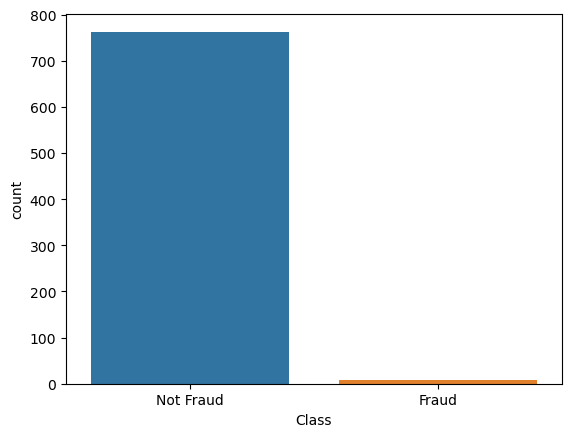

In [11]:
# plot the no of 1's and 0's
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

In [12]:
#Random over sampling (Balancing dataset)

In [13]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# divie class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (763, 31)

class 1: (9, 31)


class count of 1 and 0:
 1    763
0    763
Name: Class, dtype: int64


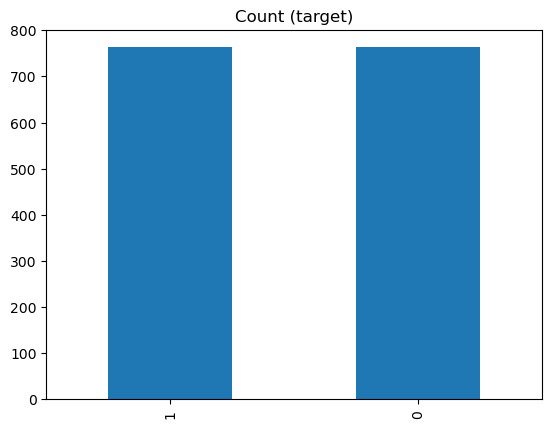

In [14]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

# print the number of class count
print('class count of 1 and 0:\n', test_over['Class'].value_counts())

# plot the count
test_over['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [15]:
# 1. RANDOM SAMPLING

In [16]:
random_sample = test_over.sample(n=100, random_state=0)

In [17]:
x = random_sample.iloc[:, :-1]
y = random_sample.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
# Training Models

In [19]:
# Support Vector Machine (SVM)

In [20]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

m11 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.7979797979797979
Accuracy score: 0.8
F1 score: 0.7777777777777778


In [21]:
# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

m21 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

m31 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.9545454545454545
Accuracy score: 0.95
F1 score: 0.9473684210526316


In [25]:
# K-Nearest Neighbour (KNN)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

m41 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.8636363636363636
Accuracy score: 0.85
F1 score: 0.8571428571428571


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
# Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

m51 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.7222222222222222
Accuracy score: 0.75
F1 score: 0.6153846153846153


In [29]:
# 2. SYSTEMATIC SAMPLING

In [30]:
# Calculate the number of rows in the dataset
n = len(test_over)

# Set the sampling interval "k" as the square root of the number of rows in the dataset
k = int(math.sqrt(n))

# Select every "k" row starting from a random index in the dataset
systematic_sample = test_over.iloc[::k]

In [31]:
x = systematic_sample.iloc[:, :-1]
y = systematic_sample.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
# Training Models

In [33]:
# Support Vector Machine (SVM)

In [34]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

m12 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.5
Accuracy score: 0.375
F1 score: 0.0


In [35]:
# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

m22 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.5666666666666667
Accuracy score: 0.625
F1 score: 0.7272727272727272


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

m32 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0


In [39]:
# K-Nearest Neighbour (KNN)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

m42 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.3
Accuracy score: 0.375
F1 score: 0.5454545454545454


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
# Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

m52 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.5666666666666667
Accuracy score: 0.625
F1 score: 0.7272727272727272


In [43]:
# 3. STRATIFIED SAMPLING

In [44]:
# group the dataframe into different strata by passing class. For each group (stratum) we randomly sampled out 0.6(60%) of observation from it.
stratified_sample = test_over.groupby("Class", group_keys=False).apply(lambda x:x.sample(frac=0.6))

In [45]:
x = stratified_sample.iloc[:, :-1]
y = stratified_sample.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
# Training Models

In [47]:
# Support Vector Machine (SVM)

In [48]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

m13 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.6998106060606062
Accuracy score: 0.7010869565217391
F1 score: 0.6820809248554913


In [49]:
# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

m23 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.9270833333333333
Accuracy score: 0.9239130434782609
F1 score: 0.9263157894736842


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

m33 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.9947916666666667
Accuracy score: 0.9945652173913043
F1 score: 0.9943502824858756


In [53]:
# K-Nearest Neighbour (KNN)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

m43 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


ROCAUC score: 0.984375
Accuracy score: 0.9836956521739131
F1 score: 0.9832402234636871


In [55]:
# Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

m53 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.7026515151515152
Accuracy score: 0.7119565217391305
F1 score: 0.6187050359712231


In [57]:
 # 4. CLUSTER SAMPLING

In [58]:
length = len(test_over)
groups = 7
elements = length / groups
group_list = []
group_id = 0
element_count = 0

for _ in test_over.iterrows():
    group_list.append(group_id)
    element_count += 1
    if element_count > elements:
        element_count = 0
        group_id += 1
        
#print(group_list) to see all group list generated.
np.unique(group_list, return_counts=True)

test_over['group'] = group_list
display(test_over.head(3))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,group
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.0,1,0
639,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.0,1,0
699,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.5,1,0


In [59]:
rd.seed(None)
group_selected = rd.randint(0, groups - 1)
group_selected = 3
print('group selected:',group_selected)

group selected: 3


In [60]:
cluster_sample = test_over[test_over['group'] == group_selected]

In [61]:
x = cluster_sample.iloc[:, :-2]
y = cluster_sample.iloc[:, -2]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
# Training Models

In [63]:
# Support Vector Machine (SVM)

In [64]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

m14 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.9473684210526316
Accuracy score: 0.9545454545454546
F1 score: 0.9444444444444444


In [65]:
# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

m24 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.8873684210526316
Accuracy score: 0.8863636363636364
F1 score: 0.8717948717948718


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

m34 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 1.0
Accuracy score: 1.0
F1 score: 1.0


In [69]:
# K-Nearest Neighbour (KNN)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

m44 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.98
Accuracy score: 0.9772727272727273
F1 score: 0.9743589743589743


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [71]:
# Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

m54 = accuracy_score(y_test, y_pred)
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

ROCAUC score: 0.9473684210526316
Accuracy score: 0.9545454545454546
F1 score: 0.9444444444444444


In [74]:
# initialize list of lists
# data = [['Support Vector Machine (SVM)', 'Logistic Regression', 'Decision Tree', 'K-Nearest Neighbour (KNN)', 'Naive Bayes'], [m11, m21, m31, m41, m51], [m12, m22, m32, m42, m52], [m13, m23, m33, m43, m53], [m14, m24, m34, m44, m54]]
data = [['Support Vector Machine (SVM)', m11, m12, m13, m14], ['Logistic Regression', m21, m22, m23, m24], ['Decision Tree', m31, m32, m33, m34], ['K-Nearest Neighbour (KNN)', m41, m42, m43, m44], ['Naive Bayes', m51, m52, m53, m54]]
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Models', 'Random', 'Systematic', 'Stratified', 'Cluster'])
  
# print dataframe.
df = df.reset_index(drop=True)
df

,Models,Random,Systematic,Stratified,Cluster
0,Support Vector Machine (SVM),0.80,0.375,0.701087,0.954545
1,Logistic Regression,1.00,0.625,0.923913,0.886364
2,Decision Tree,0.95,1.000,0.994565,1.000000
3,K-Nearest Neighbour (KNN),0.85,0.375,0.983696,0.977273
4,Naive Bayes,0.75,0.625,0.711957,0.954545


In [ ]:
# We conclude that for:
#     1. SVM: Cluter sample gives the best accuracy in this case
#     2. Logistic Regression: Random sampling gives the best accuracy in this case
#     3. Decision Tree: Systemic and cluster sampling gives the best accuracy in this case
#     4. KNN: Stratified sampling gives the best accuracy in this case
#     5. Naive Bayes: Cluster sampling gives the best accuracy in this case
        
# Furthermore, we can conclude that if we choose:
#     1. Random Sampling: Logistic Regression will give us results with most accuracy in this case
#     2. Systematic Sampling: Decision Tree will give us results with most accuracy in this case
#     3. Stratified Sampling: KNN and Decision Tree will give us results with most accuracy in this case
#     4. Cluster Sampling: Decision Tree will give us results with most accuracy in this case